<a href="https://colab.research.google.com/github/Bharatgaur/RawProjects/blob/main/Regularized_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Let us do some Python implementation of these two regularized linear regressions

### Let us load the Boston Housing Dataset, which contains some dataset about the housing values in suburbs of Boston. We'll choose the first few features, train a ridge and lasso regression separately at look at the estimated coefficients' weight for different $\lambda$ parameter.

### Note that we're choosing the first few features

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
import pandas as pd

# GitHub raw URL
url = "https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/boston_house_prices.csv"

# Load Data directly pandas dataframe
boston = pd.read_csv(url, skiprows=1)

In [37]:
boston.shape

(506, 14)

In [38]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [39]:
# Number of features
feature_num = 7

# Extract input features (first 7 columns)
X = boston.iloc[:, :feature_num]

# Extract target variable (assume 'MEDV' is the target column)
y = boston['MEDV']

# Extract feature names
features = boston.columns[:feature_num]

# Convert X to DataFrame and show top 5 rows
pd.DataFrame(X, columns=features).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2
1,0.02731,0.0,7.07,0,0.469,6.421,78.9
2,0.02729,0.0,7.07,0,0.469,7.185,61.1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8
4,0.06905,0.0,2.18,0,0.458,7.147,54.2


* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940

In [40]:
y[0:5]

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [41]:
# split into training and testing sets and standardize them
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [42]:
# loop through different penalty score (alpha) and obtain the estimated coefficient (weights)
alphas = 10 ** np.arange(1, 5)
print('different alpha values:', alphas)

# stores the weights of each feature
ridge_weight = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha, fit_intercept = True)
    ridge.fit(X_train_std, y_train)
    ridge_weight.append(ridge.coef_)

different alpha values: [   10   100  1000 10000]


In [43]:
alphas

array([   10,   100,  1000, 10000])

In [44]:
ridge_weight

[array([-1.49246448,  0.37088936, -0.70836731,  1.08568161, -0.80970633,
         4.4075122 , -0.80450999]),
 array([-1.30486468,  0.5170331 , -0.85951603,  0.96594376, -0.81006847,
         3.54696735, -0.74796938]),
 array([-0.6486645 ,  0.4993468 , -0.67576213,  0.39800779, -0.61503278,
         1.33852138, -0.56022566]),
 array([-0.11842591,  0.11262874, -0.1443168 ,  0.05431575, -0.13553009,
         0.20563081, -0.12574102])]

In [45]:
def weight_versus_alpha_plot(weight, alphas, features):
    """
    Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient weight
    for different alpha values
    """
    fig = plt.figure(figsize = (8, 6))

    # ensure that the weight is an array
    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)

    # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

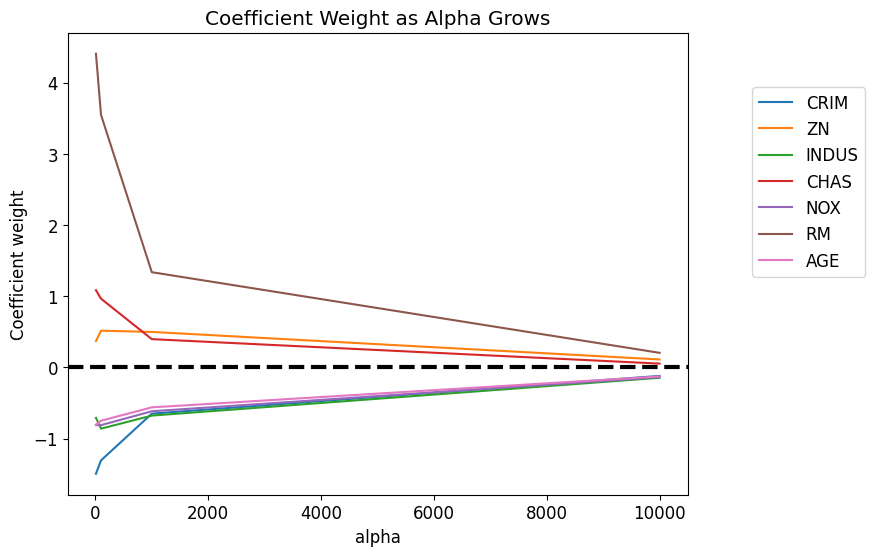

In [46]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12


ridge_fig = weight_versus_alpha_plot(ridge_weight, alphas, features)

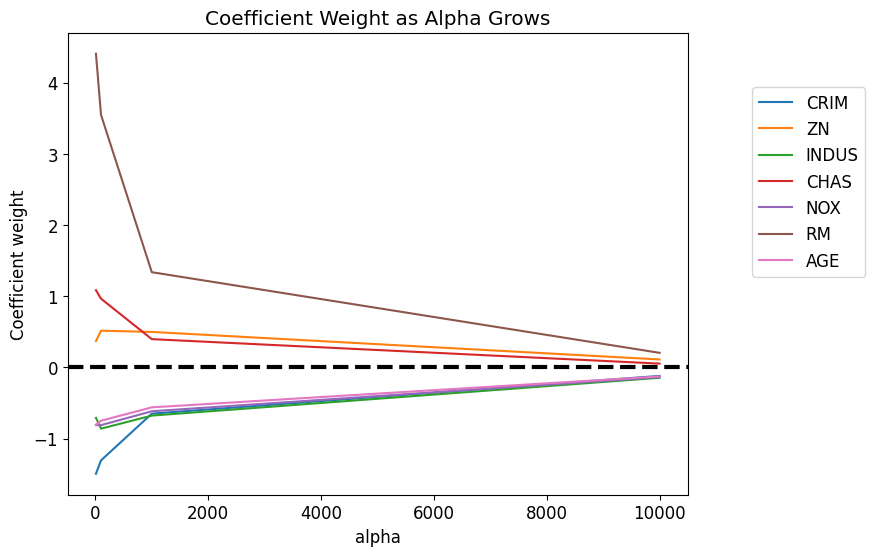

In [47]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12


ridge_fig = weight_versus_alpha_plot(ridge_weight, alphas, features)

different alpha values: [0.01, 0.1, 1, 5, 8]


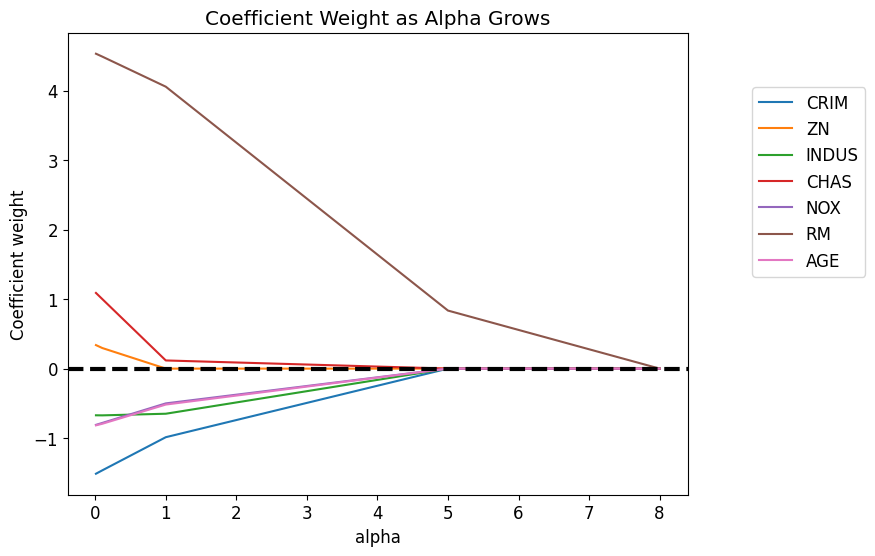

In [48]:
# does the same thing above except for lasso
alphas = [0.01, 0.1, 1, 5, 8]
print('different alpha values:', alphas)

lasso_weight = []
for alpha in alphas:
    lasso = Lasso(alpha = alpha, fit_intercept = True)
    lasso.fit(X_train_std, y_train)
    lasso_weight.append(lasso.coef_)

lasso_fig = weight_versus_alpha_plot(lasso_weight, alphas, features)

#<b><u> Advice For Applying Regularization </b> </u>

### **Signs and causes of overfitting in the original regression model**

- ### Linear models can overfit if you include irrelevant features, meaning features that are unrelated to the response. Or if you include highly correlated features, meaning two or more predictor variables are closely related to one another. Because it will learn a coefficient for every feature you include in the model, regardless of whether that feature has the signal or the noise. This is especially a problem when $p$ (number of features) is close to $n$ (number of observations).
- ### Linear models that have large estimated coefficients is a sign that the model may be overfitting the data. The larger the absolute value of the coefficient, the more power it has to change the predicted response, resulting in a higher variance.

### **Should features be standardized?**

### Yes, because L1 and L2 regularizers of linear models assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, features would be penalized simply because of their scale and make the model unable to learn from other features correctly as expected. Also, standardizing avoids penalizing the intercept, which wouldn't make intuitive sense.

### **How should we choose between Lasso regression (L1) and Ridge regression (L2)?**

- ### If model performance is our primary concern or that we are not concerned with explicit feature selection, it is best to try both and see which one works better. Usually L2 regularization can be expected to give superior performance over L1.
- ### Note that there's also a ElasticNet regression, which is a combination of Lasso regression and Ridge regression.
- ### Lasso regression is preferred if we want a sparse model, meaning that we believe many features are irrelevant to the output.
- ### When the dataset includes collinear features, Lasso regression is unstable in a similar way as unregularized linear models are, meaning that the coefficients (and thus feature ranks) can vary significantly even on small data changes.

### When using L2-norm, since the coefficients are squared in the penalty expression, it has a different effect from L1-norm, namely it forces the coefficient values to be spread out more equally. When the dataset at hand contains correlated features, it means that these features should get similar coefficients. Using an example of a linear model $Y = X1 + X2$, with strongly correlated feature of $X1$ and $X2$, then for L1-norm, the penalty is the same whether the learned model is $Y=1∗X1+1∗X2$ or $Y=2∗X1+0∗X2$. In both cases the penalty is $2∗α$. For L2-norm, however, the first model's penalty is $1^2+1^2=2α$, while for the second model is penalized with $2^2+0^2=4α$.

### The effect of this is that models are much more stable (coefficients do not fluctuate on small data changes as is the case with unregularized or L1 models). So while L2 regularization does not perform feature selection the same way as L1 does, it is more useful for feature interpretation due to its stability and the fact that useful features still tend to have non-zero coefficients. But again, please do remove collinear features to prevent a bunch of downstream headaches.

In [49]:
def generate_random_data(size, seed):
    """Example of collinear features existing within the data"""
    rstate = np.random.RandomState(seed)
    X_seed = rstate.normal(0, 1, size)
    X1 = X_seed + rstate.normal(0, .1, size)
    X2 = X_seed + rstate.normal(0, .1, size)
    X3 = X_seed + rstate.normal(0, .1, size)
    y = X1 + X2 + X3 + rstate.normal(0, 1, size)
    X = np.array([X1, X2, X3]).T
    return X, y


def pretty_print_linear(estimator, names = None, sort = False):
    """A helper method for pretty-printing linear models' coefficients"""
    coef = estimator.coef_
    if names is None:
        names = ['X%s' % x for x in range(1, len(coef) + 1)]

    info = zip(coef, names)
    if sort:
        info = sorted(info, key = lambda x: -np.abs(x[0]))

    output = ['{} * {}'.format(round(coef, 3), name) for coef, name in info]
    output = ' + '.join(output)
    return output

In [50]:
# We run the two method 10 times with different random seeds
# confirming that Ridge is more stable than Lasso
size = 100
for seed in range(10):
    print('Random seed:', seed)
    X, y = generate_random_data(size, seed)

    lasso = Lasso()
    lasso.fit(X, y)
    print('Lasso model:', pretty_print_linear(lasso))

    ridge = Ridge(alpha = 10)
    ridge.fit(X, y)
    print('Ridge model:', pretty_print_linear(ridge))
    print()

Random seed: 0
Lasso model: 0.486 * X1 + 1.508 * X2 + 0.0 * X3
Ridge model: 0.938 * X1 + 1.059 * X2 + 0.877 * X3

Random seed: 1
Lasso model: 1.034 * X1 + 0.626 * X2 + 0.0 * X3
Ridge model: 0.984 * X1 + 1.068 * X2 + 0.759 * X3

Random seed: 2
Lasso model: 1.361 * X1 + 0.0 * X2 + 0.782 * X3
Ridge model: 0.972 * X1 + 0.943 * X2 + 1.085 * X3

Random seed: 3
Lasso model: 0.0 * X1 + 1.008 * X2 + 1.134 * X3
Ridge model: 0.919 * X1 + 1.005 * X2 + 1.033 * X3

Random seed: 4
Lasso model: 0.27 * X1 + 0.0 * X2 + 1.832 * X3
Ridge model: 0.964 * X1 + 0.982 * X2 + 1.098 * X3

Random seed: 5
Lasso model: 0.0 * X1 + 0.035 * X2 + 1.854 * X3
Ridge model: 0.758 * X1 + 1.011 * X2 + 1.139 * X3

Random seed: 6
Lasso model: 0.486 * X1 + 0.0 * X2 + 1.601 * X3
Ridge model: 1.016 * X1 + 0.89 * X2 + 1.091 * X3

Random seed: 7
Lasso model: 0.441 * X1 + 0.036 * X2 + 1.582 * X3
Ridge model: 1.018 * X1 + 1.039 * X2 + 0.901 * X3

Random seed: 8
Lasso model: 0.28 * X1 + 1.974 * X2 + 0.0 * X3
Ridge model: 0.907 * X1 + 

### To sum it up, overfitting is when we build a predictive model that fits the data "too closely", so that it captures the random noise in the data rather than true patterns. As a result, the model predictions will be wrong when applied to new data. Give that our data is sufficiently large and clean, regularization is one good way to prevent overfitting from occurring.